## ESA CCI Toolbox Vector Data Access

The ESA CCI Toolbox also provides access to data that is not provided on a structured grid. This data is provided in the form of geopandas geodataframes rather than xarray datasets.

To run this Notebook, make sure the ESA CCI Toolbox is setup correctly.

For this notebook, we start as before, by opening the standard `esa-cci` data store.

In [1]:
from xcube.core.store import new_data_store

cci_store = new_data_store('esa-cci')

The data in question are GHG, SEALEVEL, and SEAICE datasets in `satellite-orbit-frequency`. Let's search for GHG datasets.

In [2]:
descriptors = cci_store.search_data(
    data_type="geodataframe",
    cci_attrs=dict(
        ecv="GHG"
    )
)
[descriptor.data_id for descriptor in descriptors]

['esacci.GHG.satellite-orbit-frequency.L2.CH4.SCIAMACHY.Envisat.IMAP.v7-2.r1',
 'esacci.GHG.satellite-orbit-frequency.L2.CH4.SCIAMACHY.Envisat.WFMD.v4-0.r1',
 'esacci.GHG.satellite-orbit-frequency.L2.CH4.TANSO-FTS.GOSAT.EMMA.ch4_v1-2.r1',
 'esacci.GHG.satellite-orbit-frequency.L2.CH4.TANSO-FTS.GOSAT.OCFP.v2-1.r1',
 'esacci.GHG.satellite-orbit-frequency.L2.CH4.TANSO-FTS.GOSAT.OCPR.v7-0.r1',
 'esacci.GHG.satellite-orbit-frequency.L2.CH4.TANSO-FTS.GOSAT.SRFP.v2-3-8.r1',
 'esacci.GHG.satellite-orbit-frequency.L2.CH4.TANSO-FTS.GOSAT.SRPR.v2-3-8.r1',
 'esacci.GHG.satellite-orbit-frequency.L2.CO2.SCIAMACHY.Envisat.BESD.v02-01-02.r1',
 'esacci.GHG.satellite-orbit-frequency.L2.CO2.SCIAMACHY.Envisat.WFMD.v4-0.r1',
 'esacci.GHG.satellite-orbit-frequency.L2.CO2.TANSO-FTS.GOSAT.EMMA.v2-2c.r1',
 'esacci.GHG.satellite-orbit-frequency.L2.CO2.TANSO-FTS.GOSAT.SRFP.v2-3-8.r1']

We have a closer look at the first one.

In [3]:
descriptors[0]

It makes sense to not open the whole dataframe but read in a subset. We ask for two variables for one day (the variable names are listed under feature_schema:properties).

In [4]:
var_names = ["xch4", "xco2_retrieved"]
time_range = ["2010-07-04", "2010-07-04"]

ghg_df = cci_store.open_data(
    "esacci.GHG.satellite-orbit-frequency.L2.CH4.SCIAMACHY.Envisat.IMAP.v7-2.r1",
    variable_names=var_names,
    time_range=time_range
)
ghg_df

,geometry,xch4,xco2_retrieved,time
0,POINT (21.12531 66.15704),1835.639282,350.589783,2010-07-04 09:37:42.694144249
1,POINT (17.33319 54.23273),1848.246216,350.940857,2010-07-04 09:41:00.557484627
2,POINT (21.32617 53.16351),1834.837891,361.529053,2010-07-04 09:41:04.307856560
3,POINT (17.02777 53.65680),1767.532104,357.012085,2010-07-04 09:41:10.557832718
4,POINT (15.31268 53.61804),1846.445312,384.051636,2010-07-04 09:41:16.057863235
...,...,...,...,...
3546,POINT (176.04736 62.59637),1756.709839,379.857666,2010-07-04 23:03:35.278387070
3547,POINT (173.65729 62.86865),1774.327759,357.646545,2010-07-04 23:03:35.778565407
3548,POINT (174.71912 62.44507),1805.762573,374.800110,2010-07-04 23:03:40.528650284
3549,POINT (173.18512 62.00031),1841.642090,350.549011,2010-07-04 23:03:50.778765678


<Axes: >

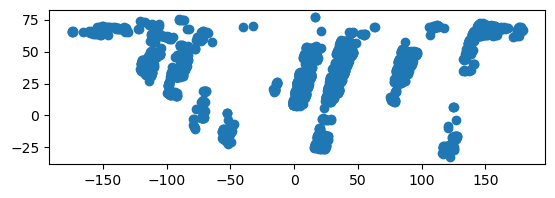

In [5]:
ghg_df.plot()